In [ ]:
import kagglehub
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('Data source import complete.')


Data source import complete.


***Installing Library***

In [ ]:
!pip install imbalanced-learn
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


# ***Importing Library***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,auc,roc_curve,roc_auc_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

***Loading Dataset***

In [ ]:
creaditdt=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
creaditdt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***General Information of Dataset***

In [ ]:
creaditdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creaditdt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


***Checking Null Values***

In [ ]:
creaditdt.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# ***Data Visualization***

***Transaction Distribution Over Time***

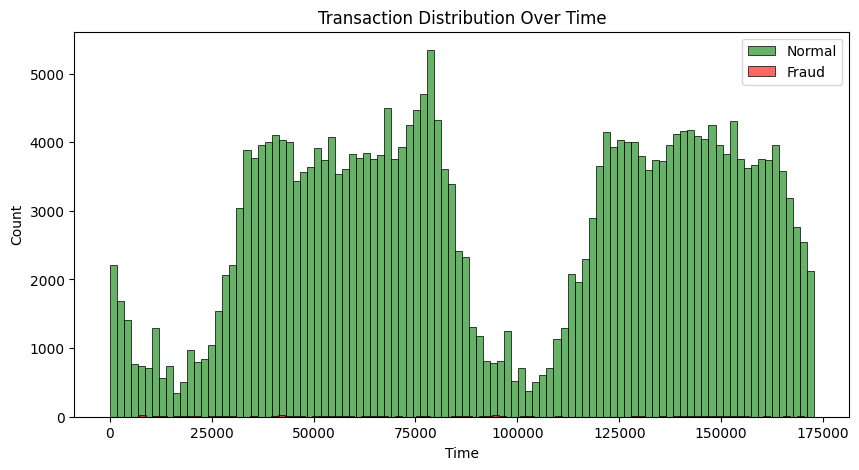

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=creaditdt[creaditdt['Class'] == 0], x='Time', color='green', bins=100, label='Normal', alpha=0.6)
sns.histplot(data=creaditdt[creaditdt['Class'] == 1], x='Time', color='red', bins=100, label='Fraud', alpha=0.6)
plt.title('Transaction Distribution Over Time')
plt.legend()
plt.show()


***Correlation between features***

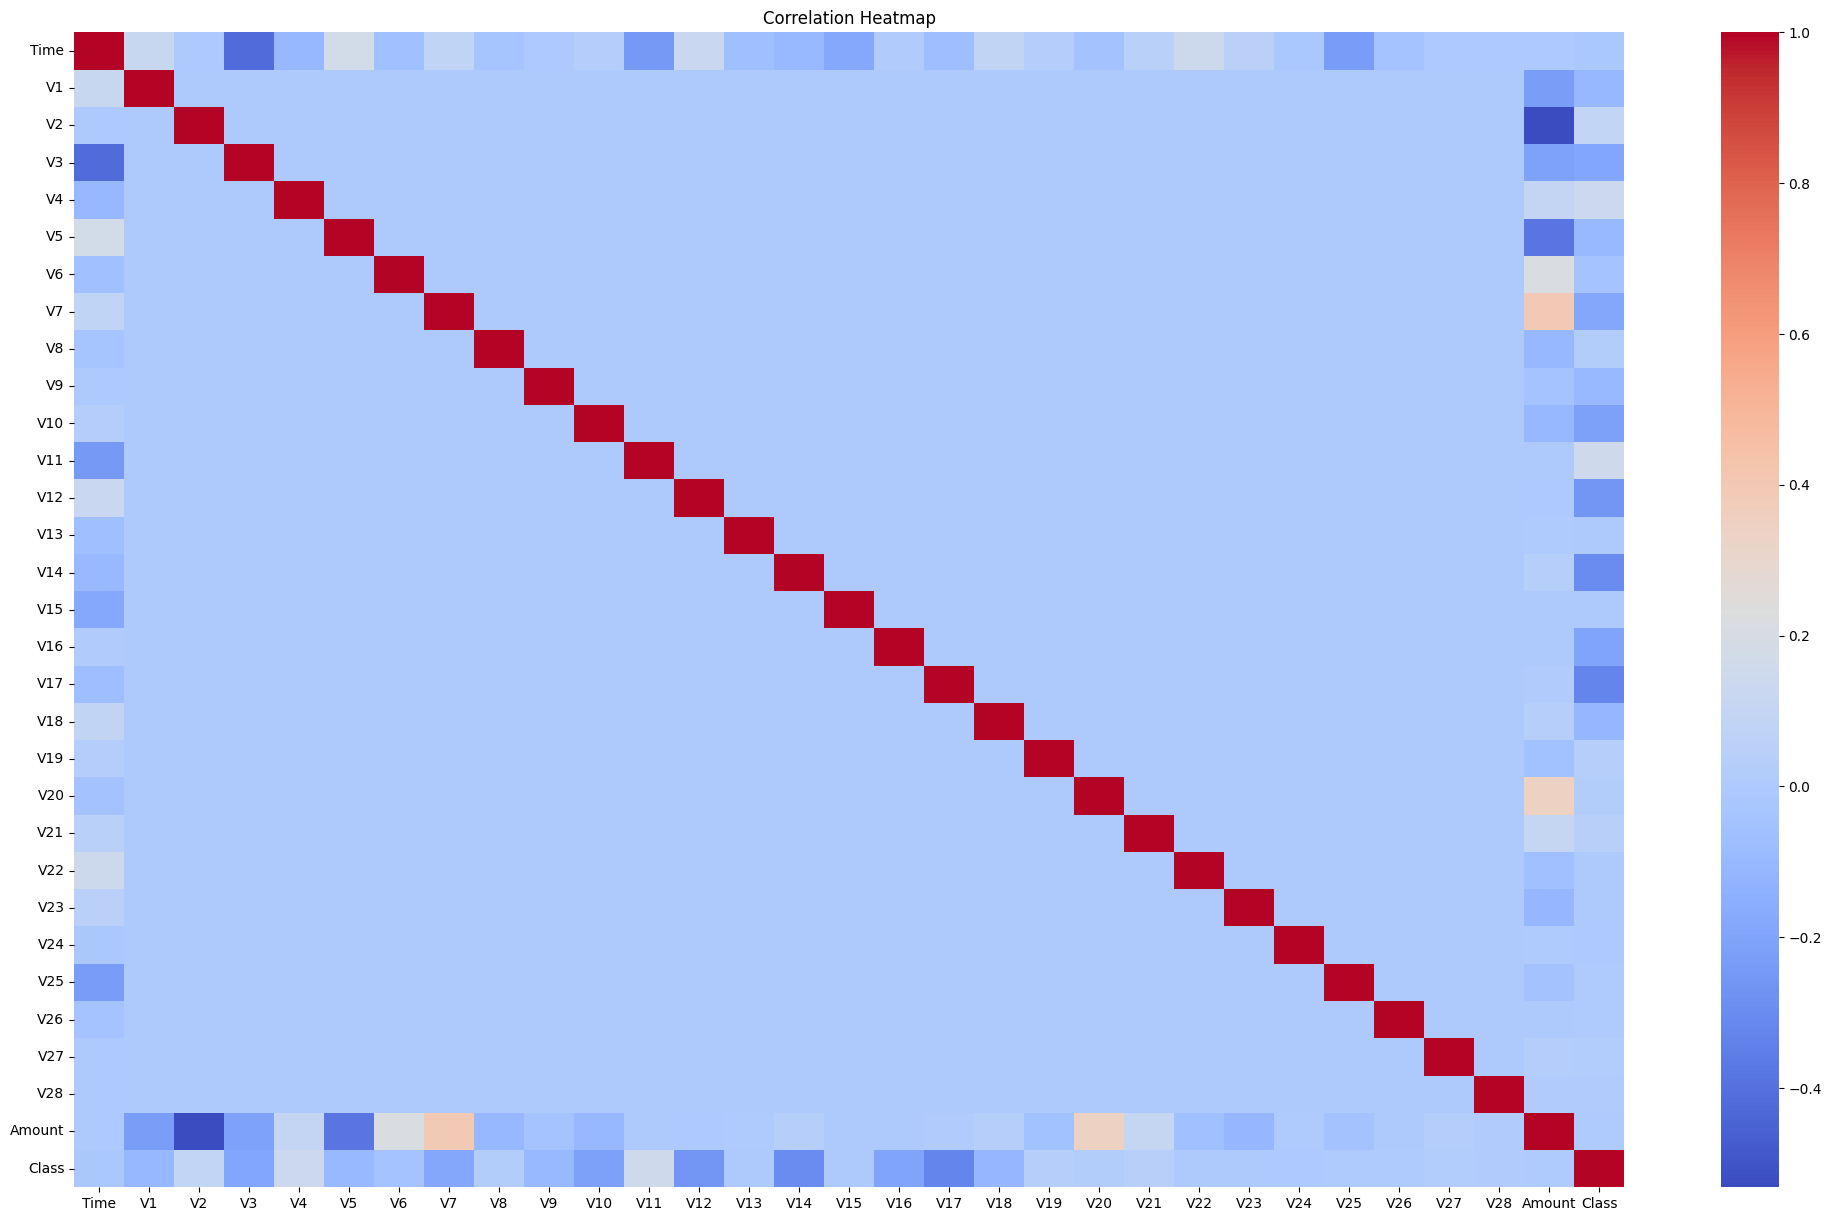

In [ ]:
corr = creaditdt.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# ***Feature Selection***

In [ ]:
X=creaditdt.drop('Class', axis=1)
y=creaditdt['Class']

***Checking Balancing Of Dataset(On Target Feature)***

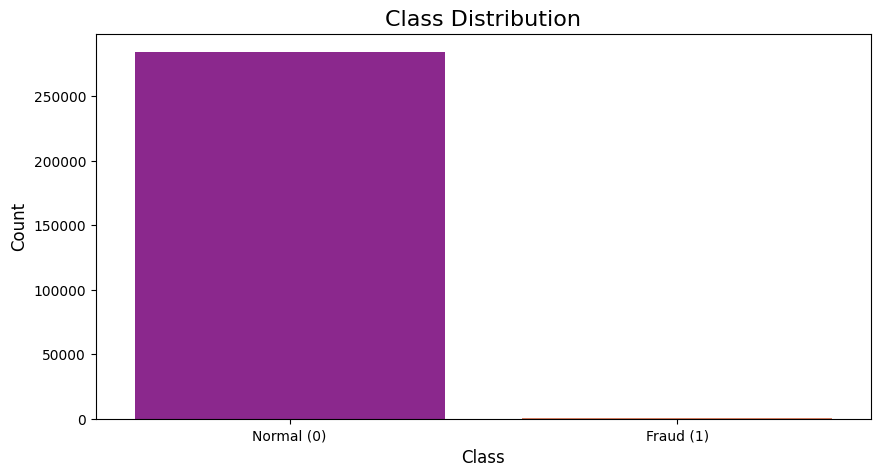

In [ ]:
y.value_counts()
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette='plasma') # Changed color palette to 'plasma'
plt.title('Class Distribution', fontsize=16) # Increased title font size
plt.xlabel('Class', fontsize=12) # Added x-axis label
plt.ylabel('Count', fontsize=12) # Added y-axis label
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)']) # Added custom x-axis labels
plt.show()

***Applying Smote for Balancing Dataset***

Original dataset shape: Class
0    284315
1       492
Name: count, dtype: int64
Resampled dataset shape: Class
0    284315
1    284315
Name: count, dtype: int64


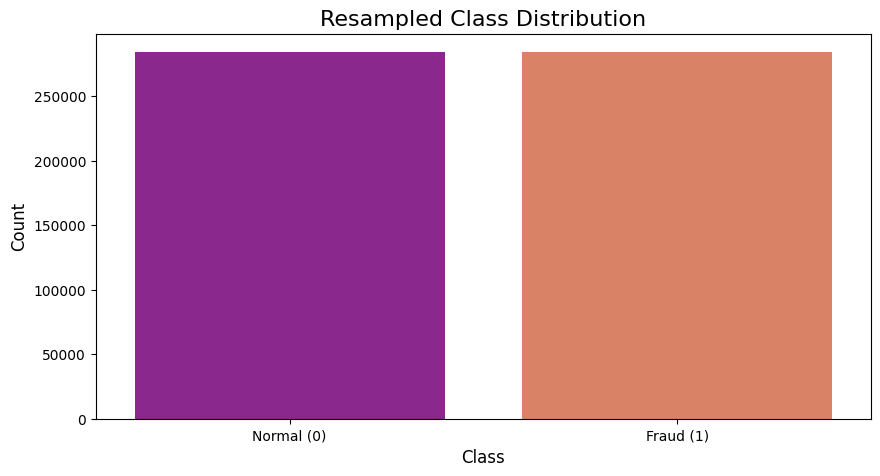

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled, palette='plasma')
plt.title('Resampled Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
plt.show()

# ***Split Dataset***

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

# ***Applying Random Forest Model***

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)
# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

# ***Saving Random Forest Model***

In [ ]:
joblib.dump(rf_model, 'Creadit_Card_Fraud_Detection_RFmodel.pkl')
print("Model saved as Creadit_Card_Fraud_Detection_RFmodel.pkl")

Model saved as Creadit_Card_Fraud_Detection_RFmodel.pkl


# ***Load Random forest Model***

In [ ]:
loaded_model = joblib.load('Creadit_Card_Fraud_Detection_RFmodel.pkl')

# ***Calculate Result on Training for RF Model***


Training Accuracy: 0.9609895714260591
Training Precision: 0.9947455138585302
Training Recall: 0.9268361345831555
Training F1 Score: 0.9595908534058357


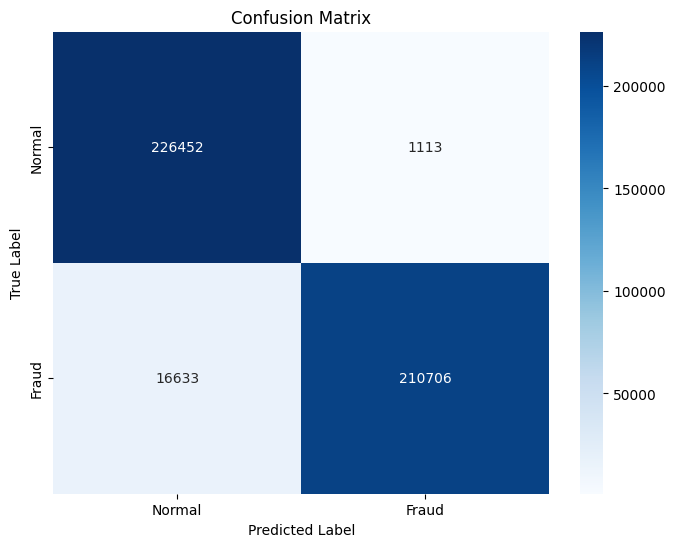

AUC Score for Training Data: 0.9609726121468939


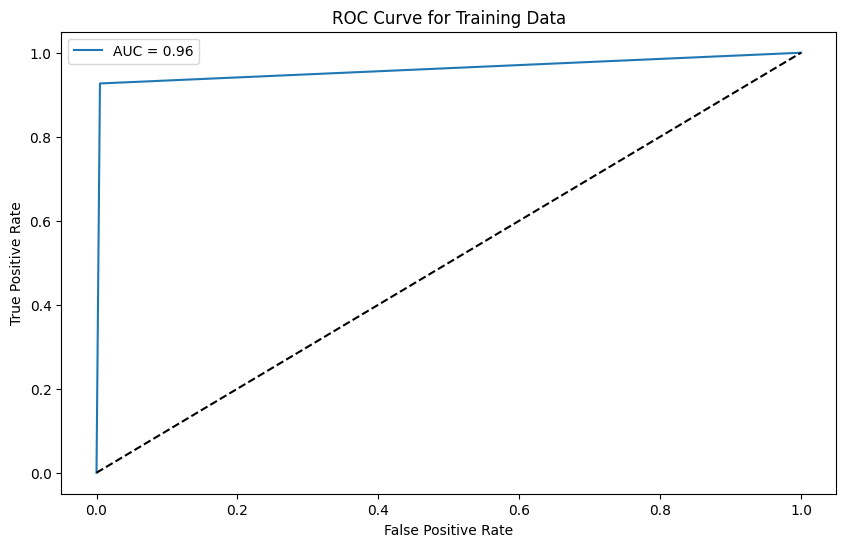

In [ ]:
#Evaluation Training Result
y_train_pred=loaded_model.predict(x_train)
train_acc_rf=accuracy_score(y_train,y_train_pred)
train_prec_rf=precision_score(y_train,y_train_pred)
train_recall_rf=recall_score(y_train,y_train_pred)
train_f1_rf=f1_score(y_train,y_train_pred)

print("Training Accuracy:",train_acc_rf)
print("Training Precision:",train_prec_rf)
print("Training Recall:",train_recall_rf)
print("Training F1 Score:",train_f1_rf)

cm_train=confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

auc_train_rf = roc_auc_score(y_train, y_train_pred)
print("AUC Score for Training Data:", auc_train_rf)
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
plt.plot(fpr_train, tpr_train, label=f'AUC = {auc_train_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend()
plt.show()

# ***Calculate Result on Testing for RF Model***

Testing Accuracy: 0.9618205159769974
Testing Precision: 0.9944945509207065
Testing Recall: 0.9289349901713002
Testing F1 Score: 0.9605974808522996


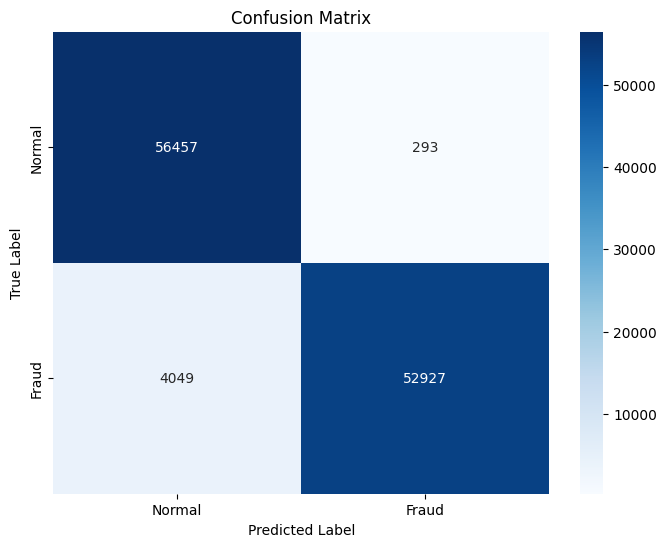

AUC Score for Testing Data: 0.9609726121468939


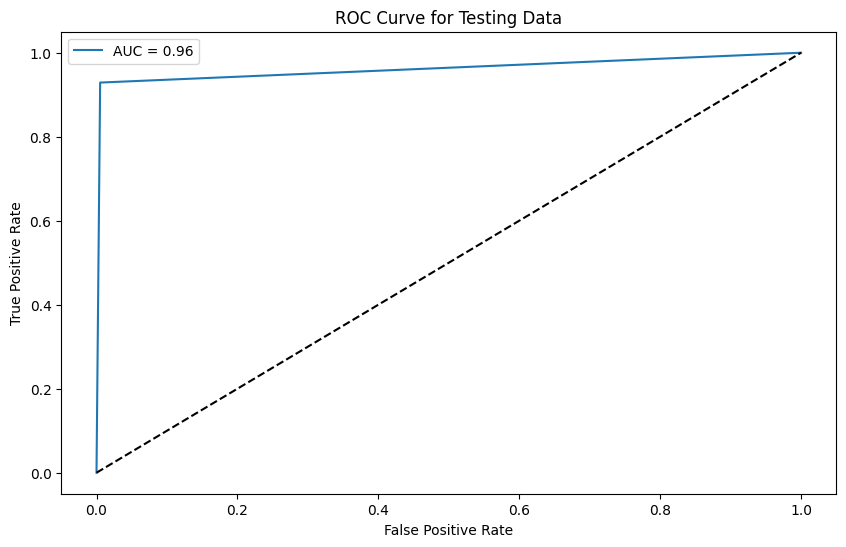

In [ ]:
#Evaluation Testing Result
y_test_pred=loaded_model.predict(x_test)
test_acc_rf=accuracy_score(y_test,y_test_pred)
test_prec_rf=precision_score(y_test,y_test_pred)
test_recall_rf=recall_score(y_test,y_test_pred)
test_f1_rf=f1_score(y_test,y_test_pred)

print("Testing Accuracy:",test_acc_rf)
print("Testing Precision:",test_prec_rf)
print("Testing Recall:",test_recall_rf)
print("Testing F1 Score:",test_f1_rf)

cm_train=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

auc_test_rf = roc_auc_score(y_test, y_test_pred)
print("AUC Score for Testing Data:", auc_train_rf)
plt.figure(figsize=(10, 6))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
plt.plot(fpr_test, tpr_test, label=f'AUC = {auc_test_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend()
plt.show()

# ***Applying CNN Model***

In [ ]:
x_train_cnn = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define the CNN model
cnn_model = Sequential()

# Add Convolutional Layer 1
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

# Add Convolutional Layer 2
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

# Flatten the output of the convolutional layers
cnn_model.add(Flatten())

# Add Dense layers (like in the ANN)
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))

# Output layer for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define Early Stopping
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the CNN model
history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping_cnn])

Epoch 1/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7969 - loss: 17.0502 - val_accuracy: 0.9559 - val_loss: 0.1331
Epoch 2/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9512 - loss: 0.1515 - val_accuracy: 0.9595 - val_loss: 0.1162
Epoch 3/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9586 - loss: 0.1208 - val_accuracy: 0.9728 - val_loss: 0.0702
Epoch 4/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9711 - loss: 0.0780 - val_accuracy: 0.9823 - val_loss: 0.0462
Epoch 5/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9794 - loss: 0.0565 - val_accuracy: 0.9893 - val_loss: 0.0296
Epoch 6/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9850 - loss: 0.0419 - val_accuracy: 0.9941 - val_loss: 0.0218
Epoch 7/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9883 - loss: 0.0351 - val_accuracy: 0.9965 - val_loss: 0.0142
Epoch 8/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9906 - loss: 

# ***Saving CNN Model***

In [ ]:
keras.saving.save_model(cnn_model, 'Creadit_Card_Fraud_Detection_CNNmodel.keras')
print("Model saved as Creadit_Card_Fraud_Detection_CNNmodel.keras")

Model saved as Creadit_Card_Fraud_Detection_CNNmodel.keras


# ***Load CNN Model***

In [ ]:
loaded_model =load_model('Creadit_Card_Fraud_Detection_CNNmodel.keras')

# ***Calculate Result on Training for CNN Model***

14216/14216 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step

CNN Model Performance on train Data:
Loss: 0.0077
Accuracy: 0.9981
Precision: 0.9965
Recall: 0.9997
F1 Score: 0.9981
AUC Score: 0.9999


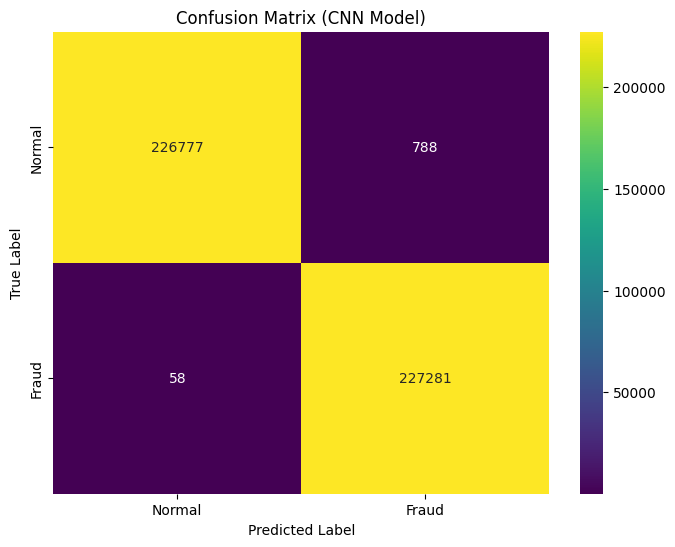

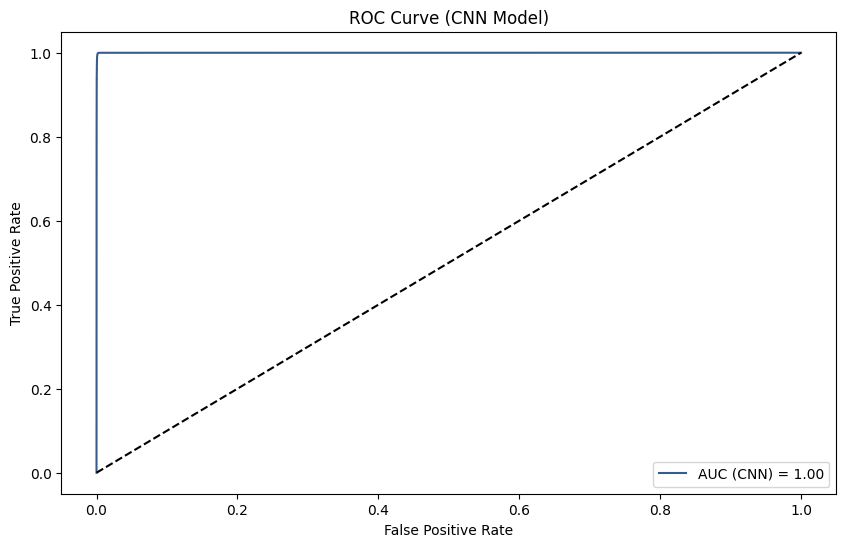

In [ ]:
# Evaluate the CNN model on the train data
loss_train_cnn, accuracy_cnn = loaded_model.evaluate(x_train_cnn, y_train, verbose=0)

# Make predictions
y_pred_cnn = loaded_model.predict(x_train_cnn)
# Convert probabilities to class labels (0 or 1)
y_pred_cnn_classes = (y_pred_cnn > 0.5).astype("int32")

# Calculate metrics
train_acc_cnn = accuracy_score(y_train, y_pred_cnn_classes)
train_prec_cnn = precision_score(y_train, y_pred_cnn_classes)
train_recall_cnn = recall_score(y_train, y_pred_cnn_classes)
train_f1_cnn = f1_score(y_train, y_pred_cnn_classes)
auc_train_cnn = roc_auc_score(y_train, y_pred_cnn) # Use probabilities for AUC

print("\nCNN Model Performance on train Data:")
print(f"Loss: {loss_train_cnn:.4f}")
print(f"Accuracy: {train_acc_cnn:.4f}")
print(f"Precision: {train_prec_cnn:.4f}")
print(f"Recall: {train_recall_cnn:.4f}")
print(f"F1 Score: {train_f1_cnn:.4f}")
print(f"AUC Score: {auc_train_cnn:.4f}")

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_train, y_pred_cnn_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix (CNN Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve for CNN
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_train, y_pred_cnn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f'AUC (CNN) = {auc_train_cnn:.2f}',color=sns.color_palette('viridis')[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CNN Model)')
plt.legend()
plt.show()

# ***Calculate Result on Testing for CNN Model***

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

CNN Model Performance on Test Data:
Loss: 0.0086
Accuracy: 0.9978
Precision: 0.9959
Recall: 0.9997
F1 Score: 0.9978
AUC Score: 0.9999


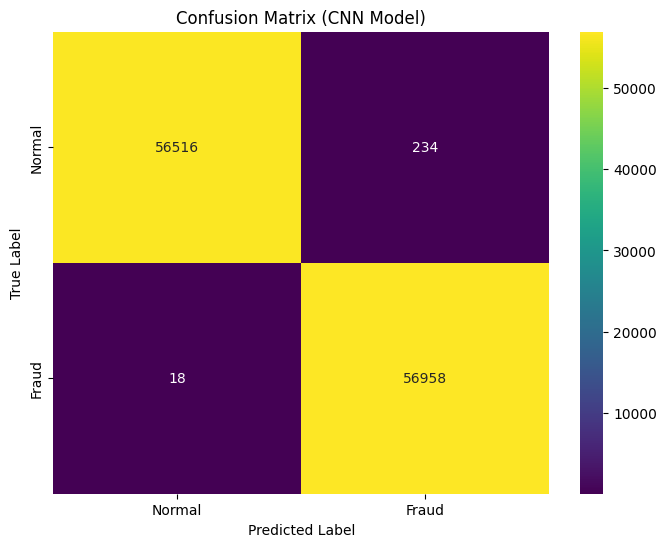

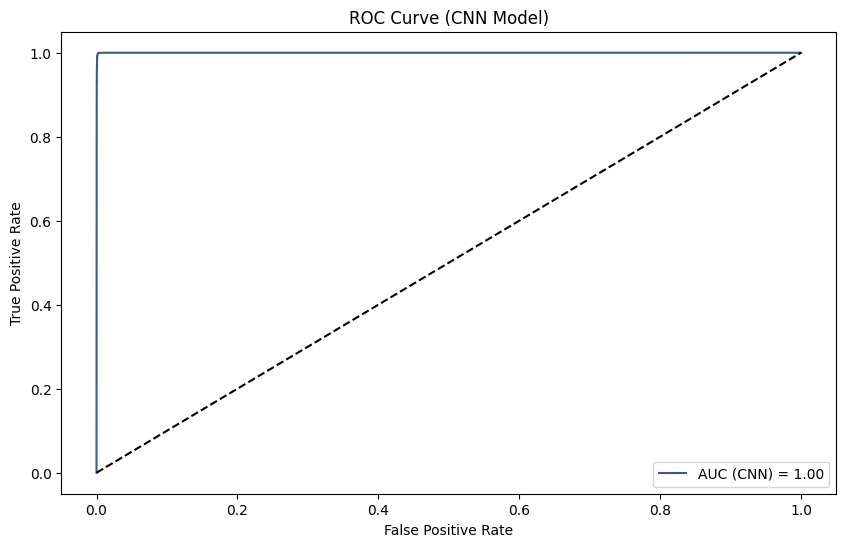

In [ ]:
# Evaluate the CNN model on the test data
loss_test_cnn, accuracy_cnn = loaded_model.evaluate(x_test_cnn, y_test, verbose=0)

# Make predictions
y_pred_cnn = loaded_model.predict(x_test_cnn)
# Convert probabilities to class labels (0 or 1)
y_pred_cnn_classes = (y_pred_cnn > 0.5).astype("int32")

# Calculate metrics
test_acc_cnn = accuracy_score(y_test, y_pred_cnn_classes)
test_prec_cnn = precision_score(y_test, y_pred_cnn_classes)
test_recall_cnn = recall_score(y_test, y_pred_cnn_classes)
test_f1_cnn = f1_score(y_test, y_pred_cnn_classes)
auc_test_cnn = roc_auc_score(y_test, y_pred_cnn) # Use probabilities for AUC

print("\nCNN Model Performance on Test Data:")
print(f"Loss: {loss_test_cnn:.4f}")
print(f"Accuracy: {test_acc_cnn:.4f}")
print(f"Precision: {test_prec_cnn:.4f}")
print(f"Recall: {test_recall_cnn:.4f}")
print(f"F1 Score: {test_f1_cnn:.4f}")
print(f"AUC Score: {auc_test_cnn:.4f}")

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix (CNN Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve for CNN
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f'AUC (CNN) = {auc_test_cnn:.2f}', color=sns.color_palette('viridis')[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CNN Model)')
plt.legend()
plt.show()

# ***Comparison of Model Performance on Test Data***

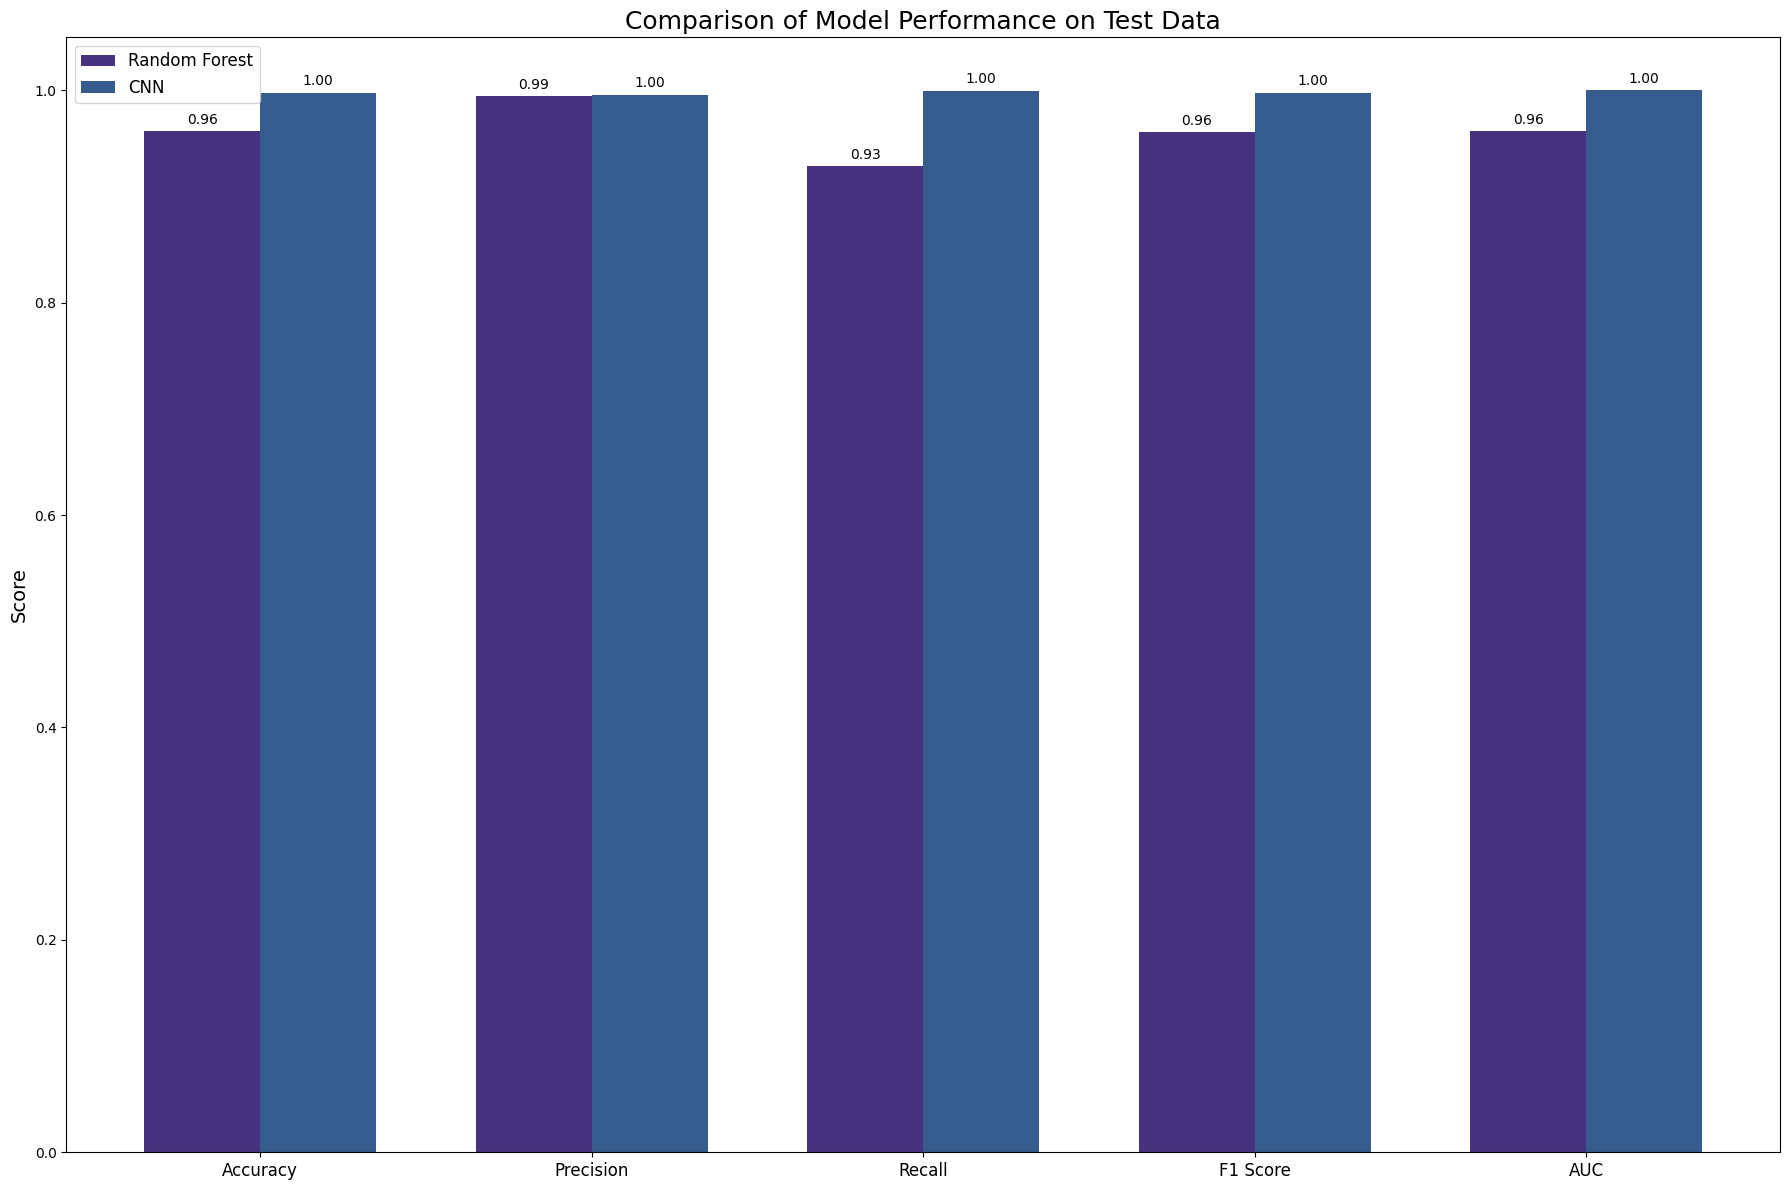

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
rf_scores = [test_acc_rf, test_prec_rf, test_recall_rf, test_f1_rf, auc_test_rf]
cnn_scores = [test_acc_cnn, test_prec_cnn, test_recall_cnn, test_f1_cnn, auc_test_cnn]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(18, 12))
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color=sns.color_palette('viridis')[0])
rects2 = ax.bar(x + width/2, cnn_scores, width, label='CNN', color=sns.color_palette('viridis')[1])

ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance on Test Data', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()